<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data), and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data)
2. Setup X and y (feature matrix and target vector)
3. Split X and y into train and test subsets.
4. Preprocess your data

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix
   
5. Create your network.
   - Remember that for multi-class classification you need a softmax activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Train your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaining the activation functions on the hidden layers, etc.
8. Load in [Kaggle's](https://www.kaggle.com/c/digit-recognizer/data) `test.csv`
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for **_at least_** two of the four "configurations":

1. Using a `tensorflow` network (we did _not_ cover this in class!)
2. Using a `keras` convolutional network
3. Using a `keras` network with regularization
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [23]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

# For reproducibility
np.random.seed(42)

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, \
Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.regularizers import l2

In [2]:
# import dataset
written = pd.read_csv('data/train.csv')
written.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Store features in X and label in y
X_before_reshape = written.drop(columns=['label'])
y = written['label']

In [4]:
# check shape of features
X_before_reshape.shape

(42000, 784)

In [5]:
# reshape each row to (28, 28) 
X = X_before_reshape.values.reshape(42000, 28, 28)
X.shape

(42000, 28, 28)

In [6]:
# scale our features to 0 to 1
X = X / X.max()

In [7]:
# check values in y
y.value_counts(normalize=True).mul(100).round(2)

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

In [8]:
# change y to catorical data
y = utils.to_categorical(y)

In [11]:
# train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y,
                                                    random_state=42)

### CNNs

Use this workflow to create models
![](image/model_workflow.png)

In [12]:
# create CNN
cnn_model = Sequential()

# Add a convolutional layer
cnn_model.add(Conv2D(# number of filters
                       filters=16,
                       # height/width of filter
                       kernel_size=(3,3),
                       # activation function 
                       activation='relu',
                       # shape of input (image)
                       input_shape=(28,28,1)))

# Add a pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2))) 
# dimensions of region of pooling

# Add another convolutional layer
cnn_model.add(Conv2D(64,
                       kernel_size=(3,3),
                       activation='relu'))

# Add another pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# We have to remember to flatten to go from the 
# "box" to the vertical line of nodes!
cnn_model.add(Flatten())

# Add a densely-connected layer with 64 neurons
cnn_model.add(Dense(64, activation='relu'))

# Let's try to avoid overfitting!
cnn_model.add(Dropout(0.5))

# Add a densely-connected layer with 32 neurons
cnn_model.add(Dense(32, activation='relu'))

# Let's try to avoid overfitting!
cnn_model.add(Dropout(0.5))

# Add a final layer with 10 neurons.
cnn_model.add(Dense(10, activation='softmax'))

#everthing above is structure

# Compile model
cnn_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Fit model on training data
history = cnn_model.fit(X_train,
                          y_train,
                          batch_size=128,
                          validation_data=(X_val, y_val),
                          epochs=10,
                          verbose=1)

Epoch 1/10
247/247 [==============================] - 8s 29ms/step - loss: 1.2005 - accuracy: 0.5840 - val_loss: 0.2305 - val_accuracy: 0.9439
Epoch 2/10
247/247 [==============================] - 7s 29ms/step - loss: 0.5467 - accuracy: 0.8241 - val_loss: 0.1210 - val_accuracy: 0.9694
Epoch 3/10
247/247 [==============================] - 7s 27ms/step - loss: 0.4090 - accuracy: 0.8699 - val_loss: 0.0917 - val_accuracy: 0.9745
Epoch 4/10
247/247 [==============================] - 7s 30ms/step - loss: 0.3539 - accuracy: 0.8890 - val_loss: 0.0790 - val_accuracy: 0.9788
Epoch 5/10
247/247 [==============================] - 6s 26ms/step - loss: 0.3169 - accuracy: 0.9019 - val_loss: 0.0662 - val_accuracy: 0.9819
Epoch 6/10
247/247 [==============================] - 6s 26ms/step - loss: 0.2862 - accuracy: 0.9078 - val_loss: 0.0652 - val_accuracy: 0.9826
Epoch 7/10
247/247 [==============================] - 6s 26ms/step - loss: 0.2694 - accuracy: 0.9151 - val_loss: 0.0620 - val_accuracy: 0.9836

In [28]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [26]:
# create function for plot image from ourdata and what number our model predicted
def predict(model, X, imgs):
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')

4/4 [==============================] - 0s 7ms/step


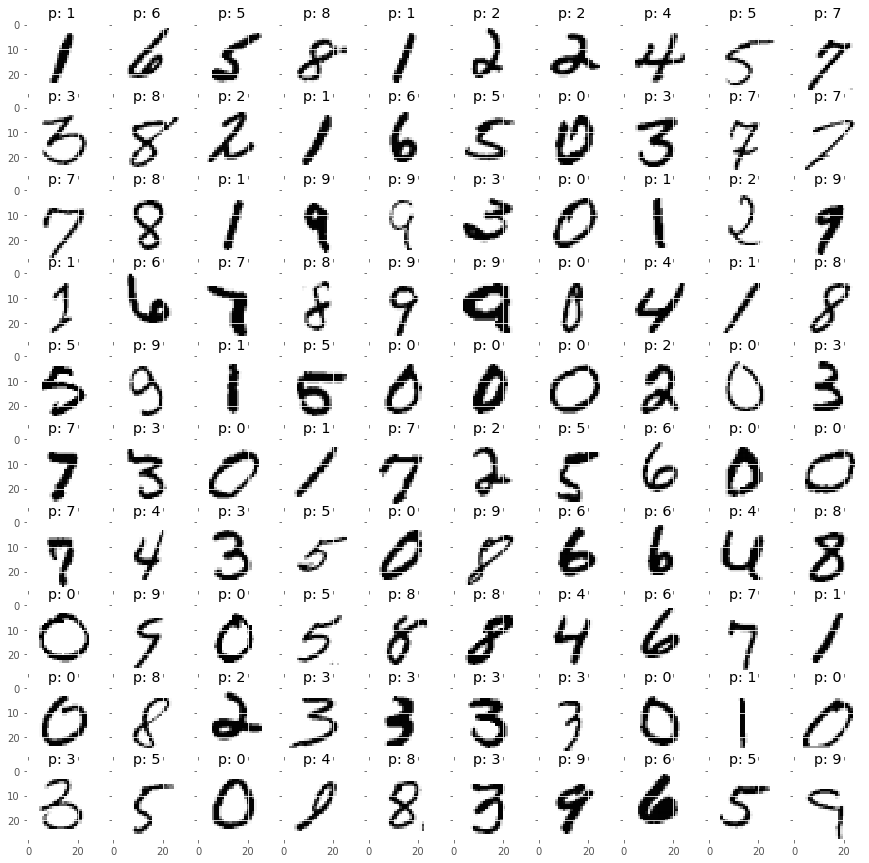

In [33]:
# plot image and what model predict
predict(cnn_model, X_val, 100)

From image above last row, column 3 model should predicted 9 but got 4.

### CNNs with Regularization

Convulution + Relu --> Max Pooling --> Convulution + Relu --> Max Pooling --> Flatten --> Dense 64 nodes + l2 --> Drop out rate 0.2 --> Dense 128 nodes + l2 --> Dense 64 nodes + l2 --> Drop out rate 0.3 --> Dense 32 nodes + l2 --> Dense 10 nodes + softmax(for prediction number)

In [43]:
# create CNN
cnn_model_l2 = Sequential()

# Add a convolutional layer
cnn_model_l2.add(Conv2D(# number of filters
                       filters=16,
                       # height/width of filter
                       kernel_size=(3,3),
                       # activation function 
                       activation='relu',
                       # shape of input (image)
                       input_shape=(28,28,1)))

# Add a pooling layer
cnn_model_l2.add(MaxPooling2D(pool_size=(2,2))) 
# dimensions of region of pooling

# Add another convolutional layer
cnn_model_l2.add(Conv2D(64,
                       kernel_size=(3,3),
                       activation='relu'))

# Add another pooling layer
cnn_model_l2.add(MaxPooling2D(pool_size=(2,2)))

# We have to remember to flatten to go from the 
# "box" to the vertical line of nodes!
cnn_model_l2.add(Flatten())

# Add a densely-connected layer with 64 neurons and l2 regulizer
cnn_model_l2.add(Dense(64, activation='relu', kernel_regularizer=l2()))

# Let's try to avoid overfitting!
cnn_model_l2.add(Dropout(0.2))

# Add a densely-connected layer with 64 neurons and l2 regulizer
cnn_model_l2.add(Dense(128, activation='relu', kernel_regularizer=l2()))

# Add a densely-connected layer with 64 neurons and l2 regulizer
cnn_model_l2.add(Dense(64, activation='relu', kernel_regularizer=l2()))

# Let's try to avoid overfitting!
cnn_model_l2.add(Dropout(0.3))

# Add a densely-connected layer with 32 neurons and l2 regulizer
cnn_model_l2.add(Dense(32, activation='relu', kernel_regularizer=l2()))

# Add a final layer with 10 neurons.
cnn_model_l2.add(Dense(10, activation='softmax'))

#everthing above is structure

# Compile model
cnn_model_l2.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Fit model on training data
history = cnn_model_l2.fit(X_train,
                          y_train,
                          batch_size=128,
                          validation_data=(X_val, y_val),
                          epochs=25,
                          verbose=1)

Epoch 1/25
247/247 [==============================] - 8s 29ms/step - loss: 1.8966 - accuracy: 0.7093 - val_loss: 0.7879 - val_accuracy: 0.9426
Epoch 2/25
247/247 [==============================] - 7s 26ms/step - loss: 0.6894 - accuracy: 0.9320 - val_loss: 0.4879 - val_accuracy: 0.9595
Epoch 3/25
247/247 [==============================] - 6s 26ms/step - loss: 0.4991 - accuracy: 0.9456 - val_loss: 0.3981 - val_accuracy: 0.9567
Epoch 4/25
247/247 [==============================] - 6s 26ms/step - loss: 0.4215 - accuracy: 0.9496 - val_loss: 0.3457 - val_accuracy: 0.9642
Epoch 5/25
247/247 [==============================] - 6s 26ms/step - loss: 0.3823 - accuracy: 0.9516 - val_loss: 0.3137 - val_accuracy: 0.9676
Epoch 6/25
247/247 [==============================] - 6s 25ms/step - loss: 0.3586 - accuracy: 0.9537 - val_loss: 0.2919 - val_accuracy: 0.9696
Epoch 7/25
247/247 [==============================] - 6s 26ms/step - loss: 0.3421 - accuracy: 0.9559 - val_loss: 0.2802 - val_accuracy: 0.9718

In [44]:
cnn_model_l2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 64)               

4/4 [==============================] - 0s 4ms/step


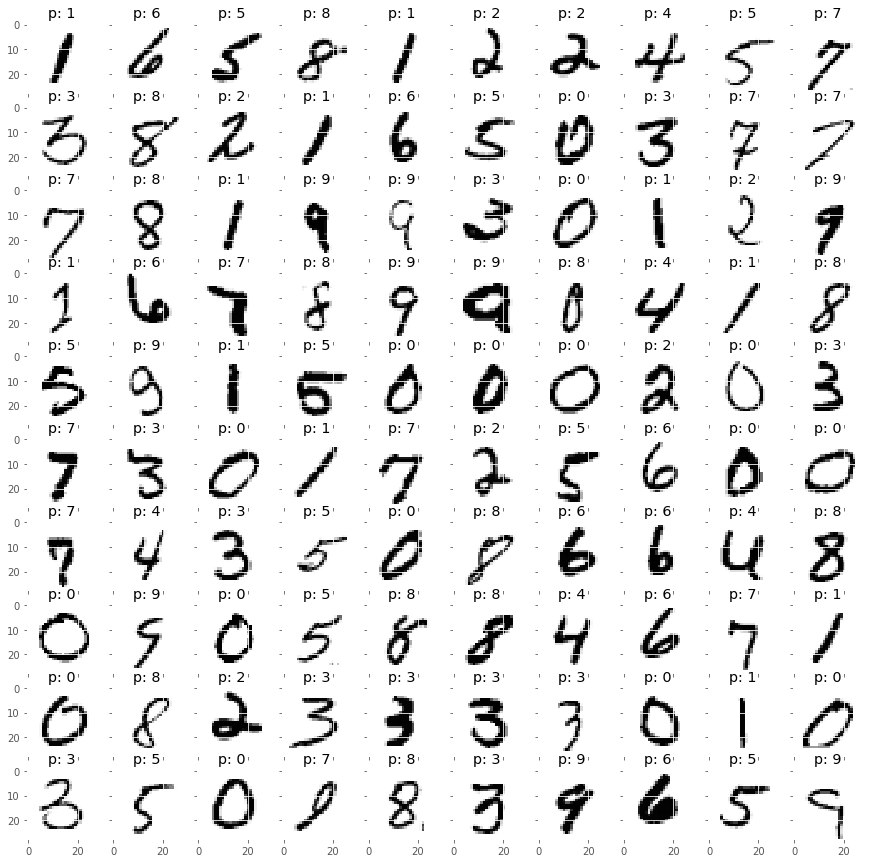

In [45]:
# plot image and what model predict
predict(cnn_model_l2, X_val, 100)

New model also can't predict value in last row column 4, 1st model predict 7 and 2nd also predict 7 which should be 9.

## Test Data

In [46]:
# import test data
test = pd.read_csv('data/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# reshape test data to matrix
X_test = test.values.reshape(test.shape[0], 28, 28)

In [48]:
# change values to 0 to 1
X_test = X_test / X_test.max()

In [50]:
# predict y_test
y_preds = cnn_model_l2.predict(X_test)

875/875 [==============================] - 3s 3ms/step


In [51]:
# extract index maximum probability
y_preds = y_preds.argmax(axis=-1)

In [52]:
# create imageid for submission file
imageid = [i for i in range(1, y_preds.shape[0]+1)]

In [53]:
# create submission file
submission = pd.DataFrame({'ImageID': imageid, 'Label':y_preds})

In [54]:
# export submission file
submission.to_csv('data/submission.csv', index=False)

---

From CNNs model got score 0.98  ![](image/cnn_model.png)

From CNNs with regularization got score 0.97 ![](image/cnn_model_l2.png)

Convolutional Neural Networks with no regularization perform better and have score higher ~0.01.

Model|Param|
---|---|
CNNs|110,000|
CNNs with regularization|130,000|

in 2nd model adjust model to be more complexity and use time more than 1st model and perform worse.

What I got from this lab is add more complexity or add more epochs to our model doesn't mean we will get good score.